## 모델 학습: 선형 회귀

* 대표적인 회귀 알고리즘입니다. 
* 선형이란 말처럼 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 
* 이때 직선을 학습한다는 말은 특성을 가장 잘 나타낼 수 있는 직선을 찾는다는 의미이다.  



In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_predict):
    MSE = mean_squared_error(y_test,y_predict,squared=True)
    RMSE = mean_squared_error(y_test,y_predict,squared=False)
    MAE = mean_absolute_error(y_test,y_predict)
    R2 = r2_score(y_test,y_predict)
    
    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

fish_df = pd.read_csv('./data/fish.csv')

x_data = fish_df.drop(['무게'], axis = 1)
y_data = fish_df['무게']

##########데이터 분석

##########데이터 전처리

# test_size = 0.3 : 학습:테스트 = 7:3으로 분리
# random_state = 777 : 랜덤시드고정 -> 이 코드가 여러 번 실행되도 똑같은 구성의 데이터를 만들기 위해서 사용한다.
# 이유는 데이터 샘플링시 랜덤으로 데이터를 구성하기 때문에 평가를 매번 다른 문제로 평가가 진행되는 꼴...
# 문제가 틀리면, 같은 문제를 다시 공부해서 풀어야 하는데...
# 777번의 의미는 내 마음대로

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)



##########모델 생성

model = LinearRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_R2: {model.score(x_train, y_train)}') #0.9371680443381393
print(f'테스트_R2: {model.score(x_test, y_test)}') #0.8324765337629763

# 모델 평가
y_predict = model.predict(x_test)

evaluate_reg_all(y_test, y_predict)

##########모델 예측

x_real = np.array([
    [50]
])

y_real_predict = model.predict(x_real)



print(f'예측값: {y_real_predict[0]}') #1245.423930742852

#model객체에 coef_와 intercept_ 속성에 저장되어 있음
print(model.coef_ , model.intercept_)

훈련_R2: 0.9111335077849486
테스트_R2: 0.9341519682404069
MSE: 6481.480, RMSE: 80.508, MAE: 64.756, R^2: 0.934
예측값: 1214.4057041788446
[37.02646696] -636.9176440163857


train 두 개의 쌍과 리니얼리그레이션(회귀알고리즘)을 이용해서 두 개로 피팅 학습을 한 후 평가를 한다. 훈련 데이터와 테스트 데이터의 점수를 본다.(검증) 예측을 한 후 이것이 실제 데이터와 얼마나 차이가 나느냐? 그 오차에 대한 결과가 나옴  / 여기까지가 모델 예측 바로 전, 

모델 예측 부분: x_test에 넘파이 50이 들어간 것은 농어길이가 만약 50이라면 무게가 몇 일까?를 보는 것. 예측 결과를 본다 1214.40gm으로 예측이 되었구나하고 마무리.

### 우리가 잘해야 하는 건 데이터 분리와 나온 결과를 잘 살펴보는 것.

---
**[농어 무게 예측 방정식]**

$y = 37.03*x - 636.92$

---

> * coef_는 기울기, intercept_를 절편이다.
> * 머신러닝에서는 기울기를 계수(coefficient) 또는 가중치(weight)라고 부른다.
> * 이는 머신러닝 알고리즘이 학습을 하고 찾은 값이라는 의미로 모델 파라미터라고 부른다. 
> * 많은 머신러닝 알고리즘의 훈련과정은 최적의 모델 파라미터를 찾는 것과 같다. 

In [8]:
fish_df.head(3)

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0


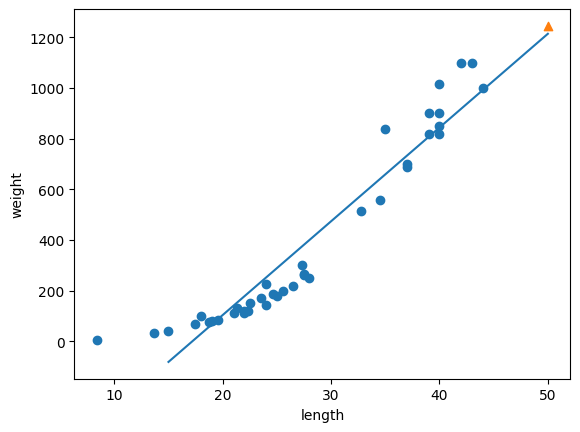

In [3]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도를 그립니다
plt.scatter(x_train, y_train)

# 농어의 길이 15에서 50까지 1차 방정식 직선 그래프를 그립니다
plt.plot([15, 50], [15*model.coef_+model.intercept_, 50*model.coef_+model.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1245.42, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> * 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있다.
> * 이제 훈련 세트 범위를 벗어난 농어의 무게도 예측가능하게 되었다. 

> * 훈련세트에 비해서 테스트 세트의 성능이 많이 떨어지는 것을 보아 과대적합이 된 것 같다. 
> * 그리고 그래프 왼쪽아래가 이상하다.
> * 무게를 음수로 예측하다니...


> * 1차 선형방정식이니 무게가 음수로 예측될 수 밖에 없다. 
> * 좀 더 예측력을 높이기 위해 곡선인 다항 회귀로 접근해야 겠다. 